In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors 
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

<AxesSubplot:>

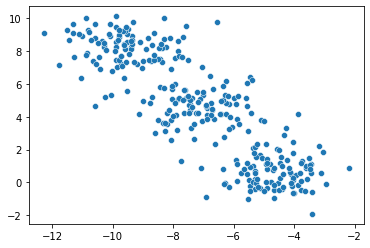

In [2]:
# 데이터 생성
data, label = make_blobs(n_samples=300, n_features=2, random_state=12) #features는 data 에 할당
sns.scatterplot(data[:,0],data[:,1])

In [3]:
# Kmeans를 이용한 군집화 (적절한 inertia를 찾아서 n_clusters 정해보기)

inertia=[]

for n_cluster in range(1,10):
    #이하 코드 작성해보기
    kmeans=KMeans(n_clusters=n_cluster)
    kmeans.fit_predict(data)
    inertia.append(kmeans.inertia_)

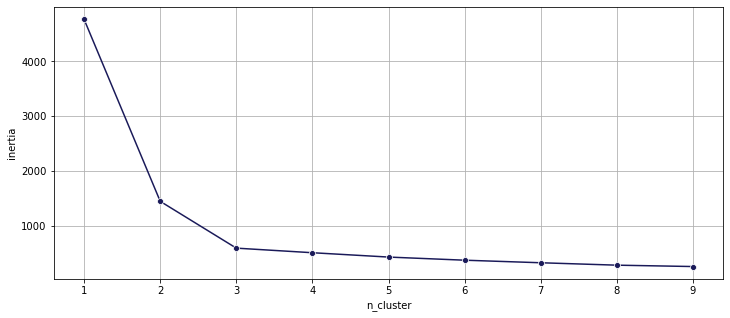

In [4]:
# inertia 확인
plt.figure(figsize=(12, 5))
ax = sns.lineplot(x=range(1,10), y=inertia, marker='o', color='#1A1A59')
ax.set_xlabel("n_cluster")
ax.set_ylabel("inertia")
ax.grid(True)
plt.show()

<AxesSubplot:>

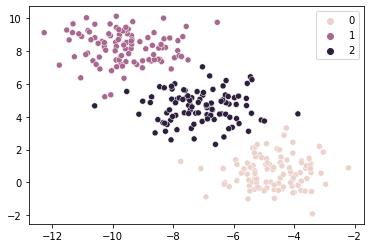

In [5]:
# 적절한 n_clusters 정해서 그래프 그려보기 (그려진 inertia 그래프 참고)
kmeans=KMeans(n_clusters=3)
label=kmeans.fit_predict(data)


sns.scatterplot(data[:,0],data[:,1], hue=label)

In [7]:
# silhouette 계수 그래프 그려보기 - 이 셀은 실행만 해주시면 됩니다
#실루엣 계수 함수

def plotSilhouette(X,y_km):
    plt.figure(figsize=(12,9))
    cluster_labels=np.unique(y_km)
    n_clusters=cluster_labels.shape[0]
    silhouette_vals=silhouette_samples(X,y_km,metric='euclidean')
    y_ax_lower, y_ax_upper=0,0
    yticks=[]

    for i,c in enumerate(cluster_labels):
        c_silhouette_vals=silhouette_vals[y_km==c]
        c_silhouette_vals.sort()
        y_ax_upper+=len(c_silhouette_vals)
        color=cm.jet(i/n_clusters)

        plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower+y_ax_upper)/2)
        y_ax_lower+=len(c_silhouette_vals)

    silhouette_avg=np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,color='red',linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('클러스터')
    plt.xlabel('실루엣 계수')
    plt.show()


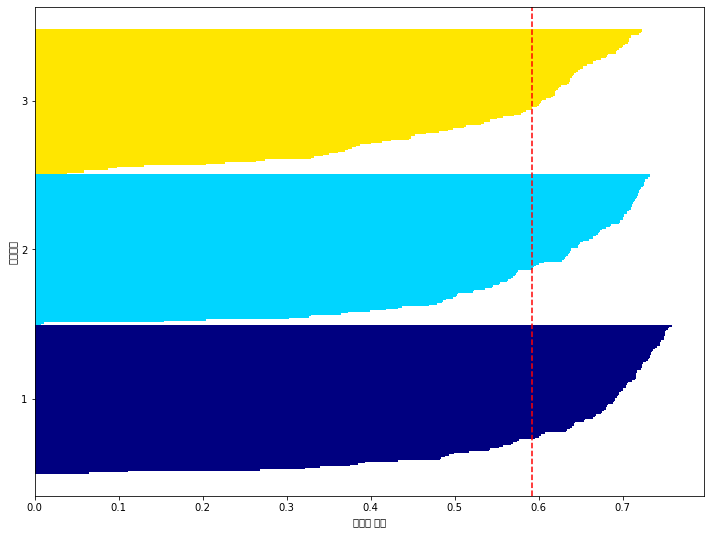

In [9]:
# 군집 수를 정한 후 실루엣 계수 그리기
plotSilhouette(data,label)

<AxesSubplot:>

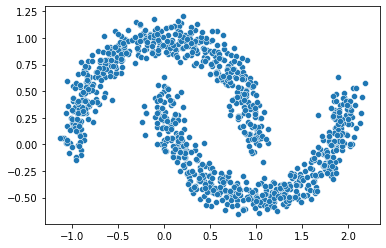

In [10]:
# DBSCAN
# 데이터 생성
from sklearn.datasets import make_checkerboard
X,y=make_moons(n_samples=1000, shuffle=True, noise =0.09, random_state=1001) #features는 X에 할당

sns.scatterplot(X[:,0],X[:,1])

In [11]:
# 적절한 eps을 찾기 , min_samples 와 n_neighbors =5 로
neighbor = NearestNeighbors(n_neighbors=5)
neighbor.fit(X)
neigh_dist, neigh_ind = neighbor.kneighbors(X)

In [13]:
neigh_dist

array([[0.        , 0.02729983, 0.03010431, 0.05072475, 0.05809286],
       [0.        , 0.0373968 , 0.04526103, 0.04737294, 0.04827224],
       [0.        , 0.02965242, 0.03534532, 0.0495964 , 0.05015531],
       ...,
       [0.        , 0.05215147, 0.05697574, 0.05896632, 0.06986527],
       [0.        , 0.0078825 , 0.0081171 , 0.02617917, 0.03685877],
       [0.        , 0.03675164, 0.0398423 , 0.04125068, 0.0440644 ]])

<AxesSubplot:>

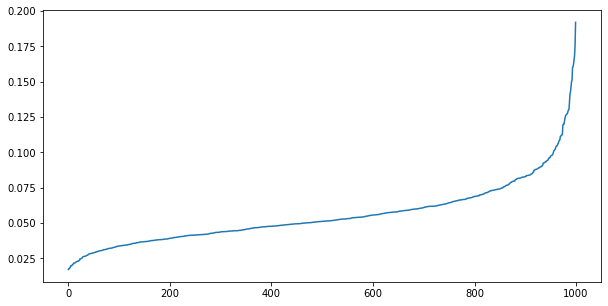

In [18]:
# eps 그래프 그려보기
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(neigh_dist.shape[0]), y=np.sort(neigh_dist[:,4]))

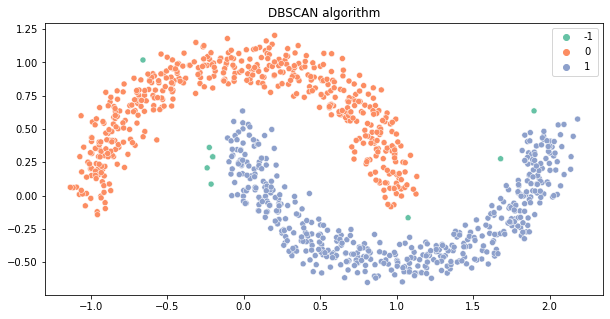

In [22]:
# 적절하다고 판단되는 eps, 로 DBSCAN 다시 수행 (min_samples 는 5로 해주시면 됩니다)
dbscan = DBSCAN(eps=0.11, min_samples=5)
label = dbscan.fit_predict(X)

plt.figure(figsize=(10, 5))
ax = sns.scatterplot(X[:, 0], X[:, 1], hue=label, palette='Set2')
ax.set_title("DBSCAN algorithm")
plt.show()